Workplan :

Data Understanding and Preparation
Data Cleaning: Address missing values, inconsistent formats, and outliers to ensure data quality.
Feature Engineering: Derive new features (e.g., time of day categories, weather severity index) to enrich the dataset.
Explore the Dataset to understand the features, distributions, and any anomalies.
Analysis and Insights, Univariate and Bivariate Analysis: Examine individual features and their relationships with accident severity.
Temporal Analysis: Identify accident hotspots and seasonal trends.
Predictive Modeling Train multiple machine learning models (e.g., Logistic Regression, Random Forest, SVM) to predict accident severity.

Model Evaluation: Compare model performance using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. Hyperparameter Tuning: Optimize the best-performing model for enhanced accuracy.

Communication of the results.

Loading data

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "US_Accidents_March23.csv"  # Ensure this file is in the same directory as the notebook
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
2. Clean your data:
Evaluate the quality of data.
Identify relevant features.
Missing values or any additional operations ? (use different missing appraoches to tackle the missing values issue, create different data variants for a later comparison).
statistics, check data types, conversions and more ?
Divide data into two parts one for experiments, another portion for validation (explain the logic of your splitting).

In [ ]:
Data preparation

In [52]:
US_Accidents=data.copy()

In [53]:
US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7728394 entries, 0 to 7728393
,Data columns (total 46 columns):
, #   Column                 Dtype  
,---  ------                 -----  
, 0   ID                     object 
, 1   Source                 object 
, 2   Severity               int64  
, 3   Start_Time             object 
, 4   End_Time               object 
, 5   Start_Lat              float64
, 6   Start_Lng              float64
, 7   End_Lat                float64
, 8   End_Lng                float64
, 9   Distance(mi)           float64
, 10  Description            object 
, 11  Street                 object 
, 12  City                   object 
, 13  County                 object 
, 14  State                  object 
, 15  Zipcode                object 
, 16  Country                object 
, 17  Timezone               object 
, 18  Airport_Code           object 
, 19  Weather_Timestamp      object 
, 20  Temperature(F)         float64
, 21  Wind_Chill(F)          float

In [54]:
#check for duplicates
US_Accidents.duplicated().sum()
US_Accidents = US_Accidents.drop_duplicates()


In [55]:
missing_values = US_Accidents.isnull().sum()
missing_values = missing_values.sort_values(ascending = False)
missing_values

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [ ]:
Missing Values

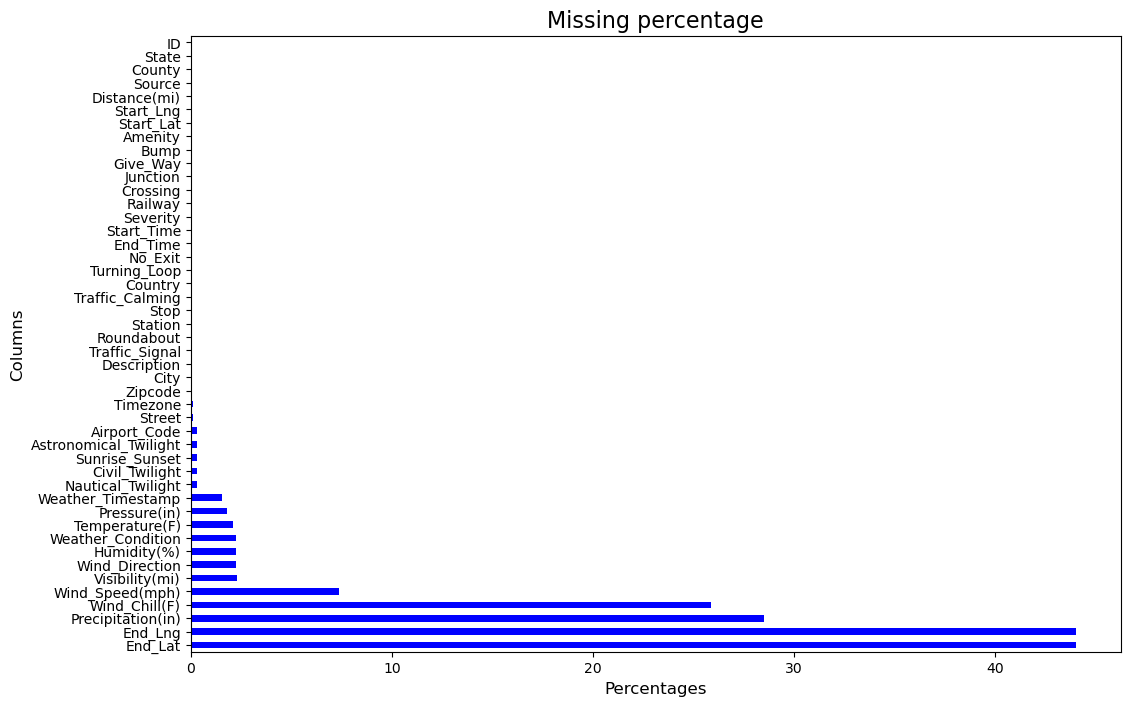

In [56]:

# see are the missing value by Percentage
missing_percentage = US_Accidents.isnull().sum().sort_values(ascending=False)/len(US_Accidents)*100
plt.figure(figsize=(12, 8))

missing_percentage.plot(kind='barh', color='blue')

plt.title('Missing percentage', fontsize=16)
plt.xlabel('Percentages', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()

In [57]:
# Dropping columns with more than 25% missing percentage
columns_to_drop = missing_percentage[missing_percentage > 25].index
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [58]:
num_cols=US_Accidents.select_dtypes(include=['float64','int64']).columns
cat_cols=US_Accidents.select_dtypes(include=['object']).columns

In [59]:
US_Accidents[num_cols].describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.564541e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,5.618423e-01,6.166329e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00
std,4.875313e-01,5.076079e+00,1.739176e+01,1.776811e+00,1.901365e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00
min,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,0.000000e+00,4.900000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.000000e-02,6.400000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.640000e-01,7.600000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03


In [60]:
import warnings
warnings.filterwarnings('ignore')

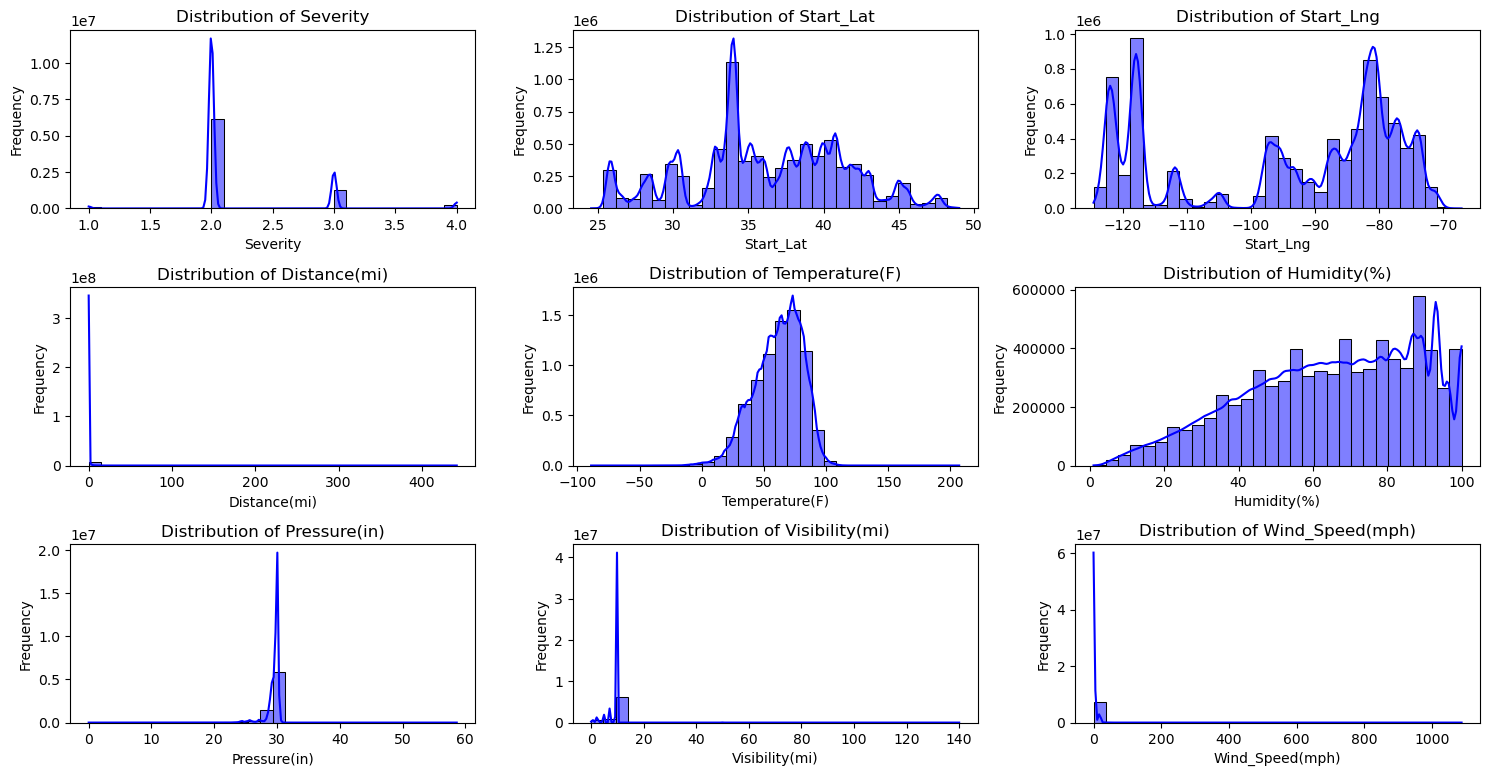

the done


In [61]:
# Plot the distribution of each numerical column to see how to impute the missing values
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.histplot(US_Accidents[col], kde= True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("the done")

In [62]:
# i will use the mean for filling  Temperature(F) due to its symmetry
# and the median for other columns to mitigate the effects of outliers and skewed distributions.
US_Accidents['Temperature(F)']=US_Accidents['Temperature(F)'].fillna(US_Accidents['Temperature(F)'].mean())

fill_with_median = [col for col in num_cols if col != 'Temperature(F)']
US_Accidents[fill_with_median]=US_Accidents[fill_with_median].fillna(US_Accidents[fill_with_median].median())

In [63]:
# mode for the categorical cols
US_Accidents[cat_cols]=US_Accidents[cat_cols].fillna(US_Accidents[cat_cols].mode().iloc[0])

In [64]:
US_Accidents.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [ ]:
Feature selection

In [66]:

#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['ID', 'Description', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# Drop the columns
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [67]:
 # check for unique values of each col
cat_cols=US_Accidents.select_dtypes(include=['object']).columns

for cat in cat_cols:
    print(cat, US_Accidents[cat].nunique())

Source 3
,Start_Time 6131796
,End_Time 6705355
,Street 336306
,City 13678
,State 49
,Country 1
,Weather_Timestamp 941331
,Weather_Condition 144
,Sunrise_Sunset 2


In [68]:

#drop country col because it has only one value
US_Accidents = US_Accidents.drop(columns=['Country'])

In [ ]:
I will encode the categorical features later before the modeling because i need the categories to better understand the EDA analysis

In [ ]:
EDA with visualization
In the upcoming phase of our analysis, we are poised to construct a series of informative visualizations as part of our Exploratory Data Analysis (EDA). Our strategic visualization approach encompasses the following key objectives:

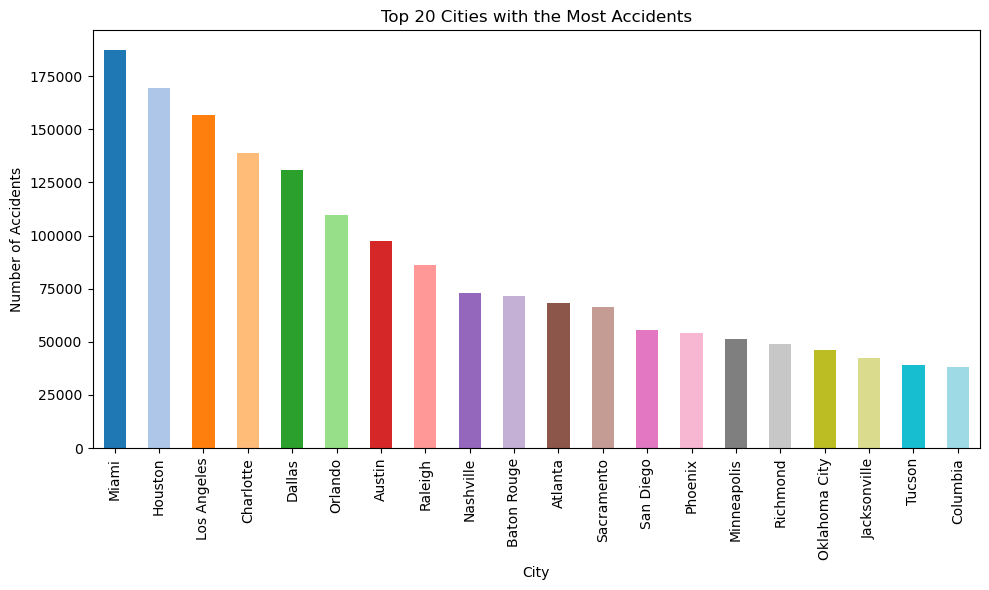

In [69]:
#Analysis by location:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)

# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

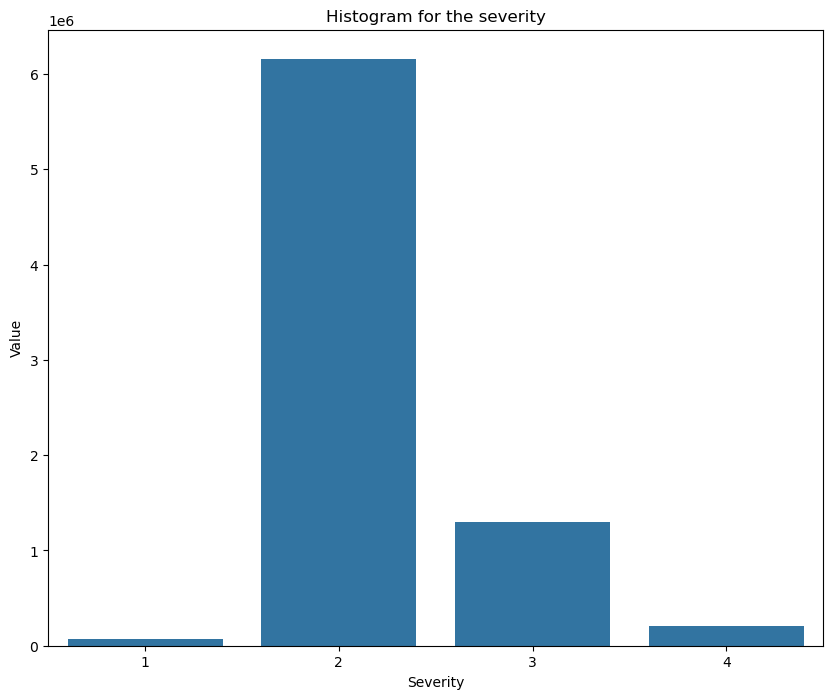

In [70]:
#check if the data is unbalenced
severity_counts = US_Accidents["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()


In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalermax = MinMaxScaler()
scalerstd = StandardScaler()
fill_with_median = [col for col in fill_with_median if col != 'Severity']
US_Accidents[fill_with_median] = scalermax.fit_transform(US_Accidents[fill_with_median])
US_Accidents['Temperature(F)'] = scalerstd.fit_transform(US_Accidents[['Temperature(F)']])

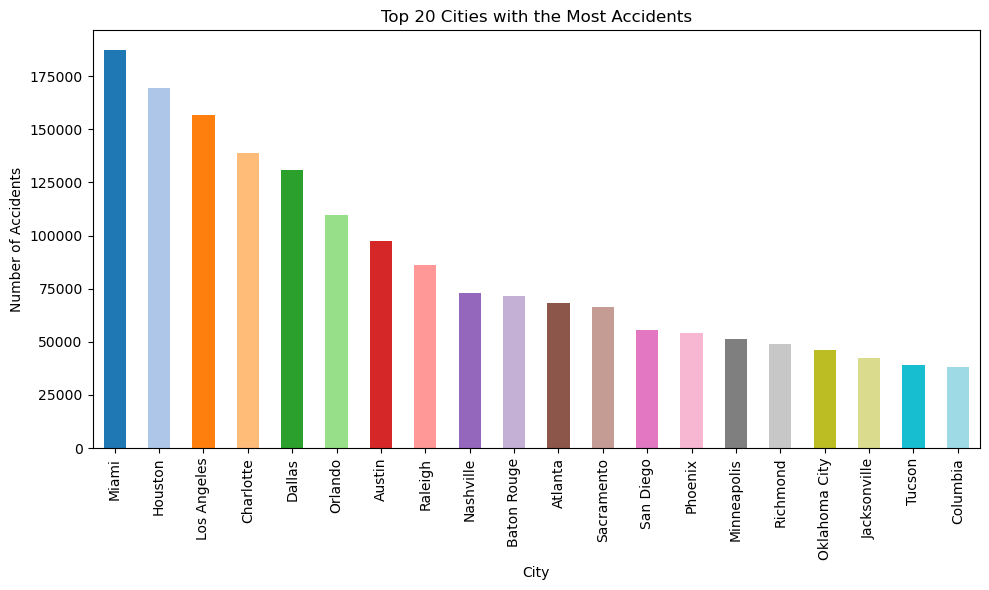

In [72]:
#Analysis by location:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)

# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [ ]:
we can see that most of the cities have the very few accidents there is very few cities which have the very high accidenets.
Miami is the highest city with high number of accidents

<Axes: xlabel='Start_Time', ylabel='Density'>

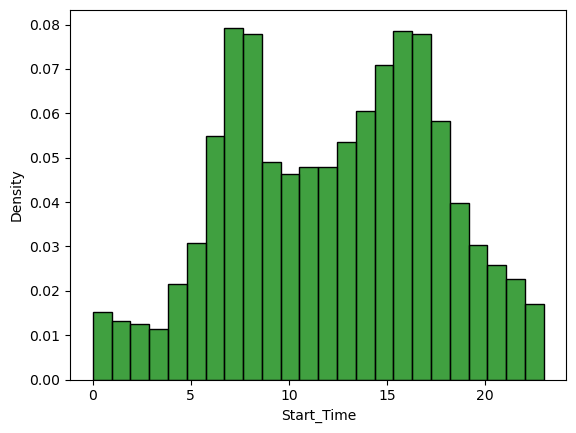

In [73]:
#Analaysis by Date
US_Accidents.Start_Time = pd.to_datetime(US_Accidents['Start_Time'] , format='mixed', errors='coerce' )
sns.histplot( US_Accidents.Start_Time.dt.hour , bins = 24 , kde = False, stat = 'density' ,color = 'green')

In [ ]:
we see that most of the Accidents occured in between the 6am to 9am and other is 2pm to 6pm

<Axes: xlabel='Start_Time', ylabel='Density'>

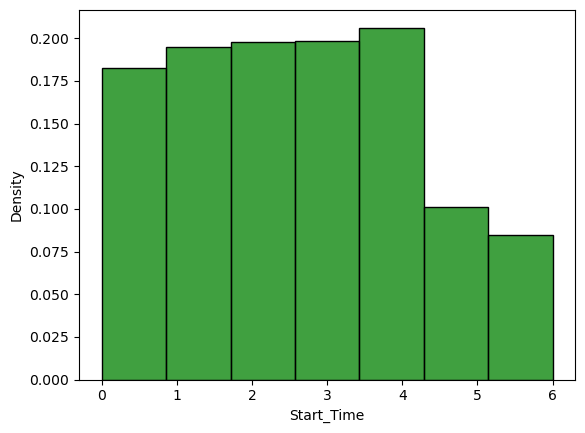

In [23]:
# US_Accidents.Start_Time.dt.day this give the day (actually the date from 30 days)
sns.histplot( US_Accidents.Start_Time.dt.dayofweek , bins = 7 , kde = False , stat = 'density' , color = 'green')
# this give the day position in week...  0 : sunday , 1 : monday , 2 : tuesday , 3 :wednesday

In [ ]:
As we can see from the plot above, the days with the most accidents are working days, while in the weekend we have less accidents. This may be due to the fact that during the weekend there are fewer cars on the road.

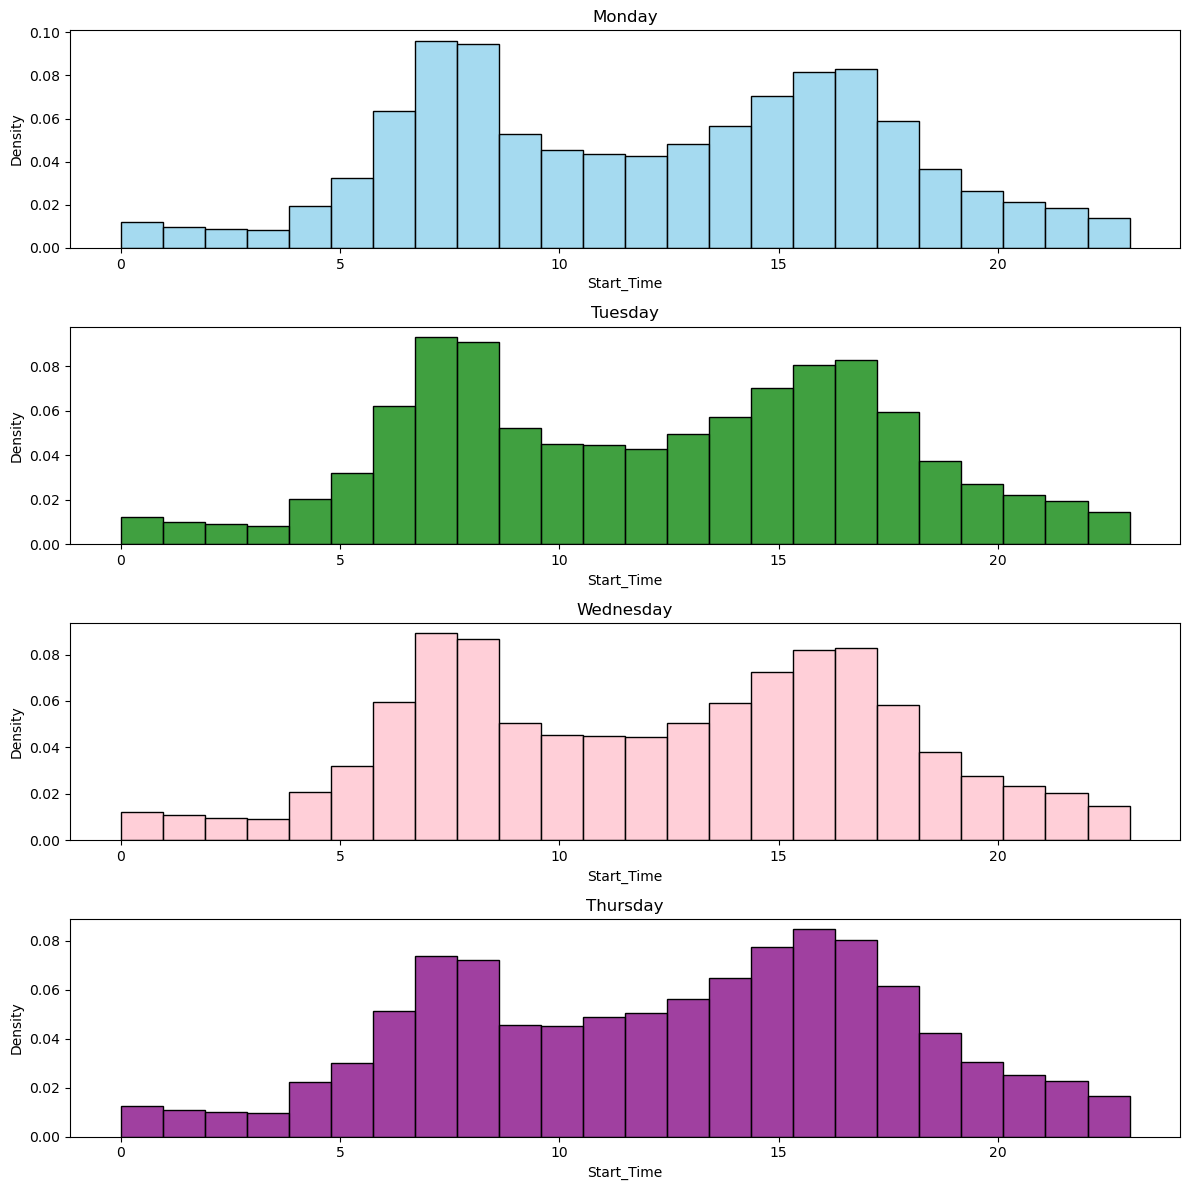

In [24]:
# checkout the distribution of accident on normal working day...

mon_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 1]
tues_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 2]
wednes_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 3]
thurs_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 4]

fig, axis = plt.subplots(4, 1, figsize=(12, 12))

sns.histplot(mon_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue').set_title('Monday')
sns.histplot(tues_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green').set_title('Tuesday')
sns.histplot(wednes_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[2], color='pink').set_title('Wednesday')
sns.histplot(thurs_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[3], color='purple').set_title('Thursday')

fig.tight_layout()

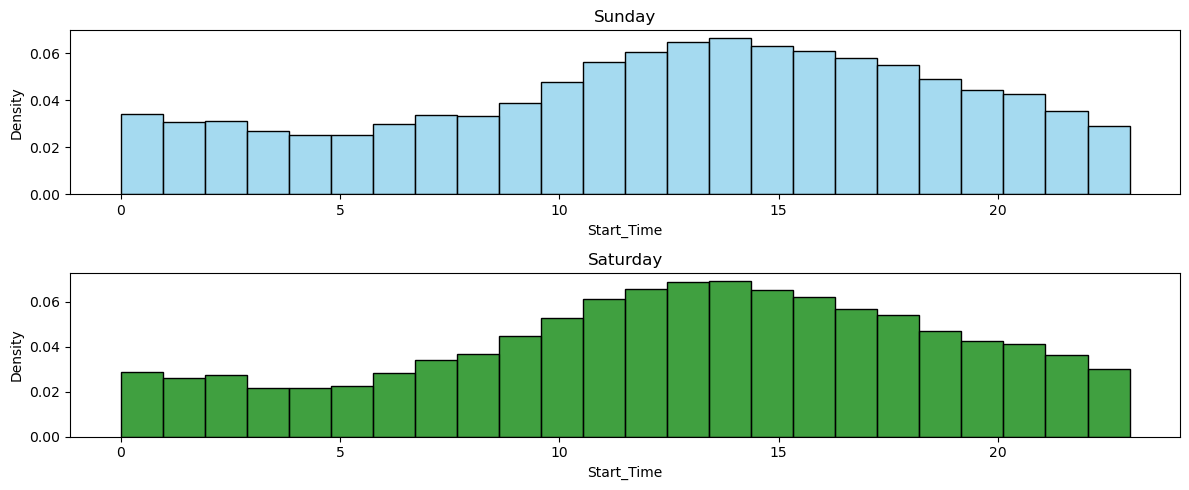

In [74]:
 # now let's checkout the distribution of accident time on the weekends
sun_day = US_Accidents[US_Accidents.Start_Time.dt.dayofweek == 6]
sat_day = US_Accidents[US_Accidents.Start_Time.dt.dayofweek == 5]

fig, axis = plt.subplots(2, 1, figsize=(12, 5))

sns.histplot(sun_day.Start_Time.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue')
axis[0].set_title('Sunday')

sns.histplot(sat_day.Start_Time.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green')
axis[1].set_title('Saturday')

fig.tight_layout()

plt.show()


In [ ]:
we can see that thare is the diffrance between the distributioin of the accident time in weekends and normal days in weekends generally all accidents are happends after 10 am to 3pm while normal day it occured in between the 6am to 9am and then 3 pm to 5 pm

<Axes: ylabel='Weather_Condition'>

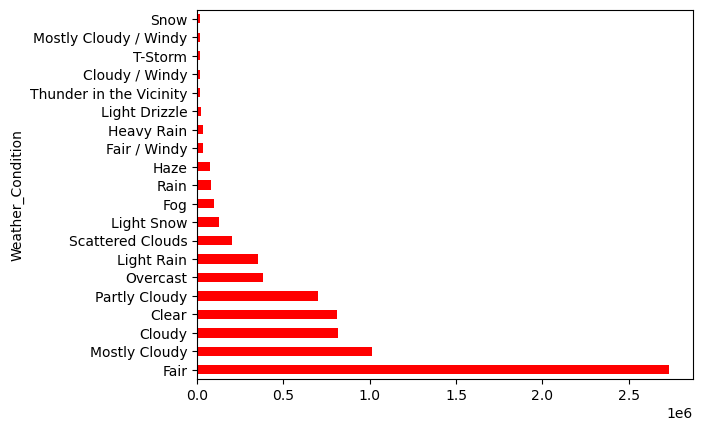

In [75]:
US_Accidents.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , color = 'red')

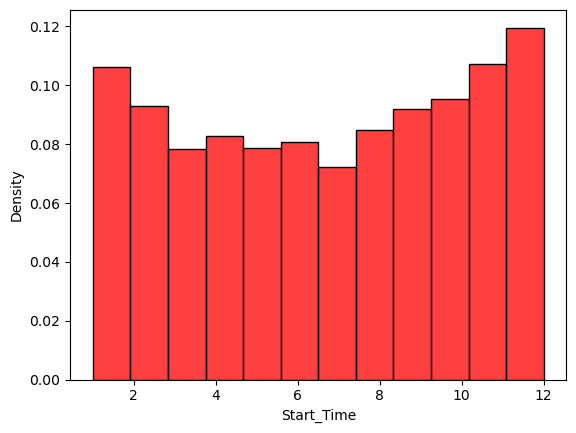

In [76]:
sns.histplot(US_Accidents.Start_Time.dt.month, kde=False, bins=12, stat='density', color='red')
plt.show()

In [ ]:
so in Winter and Rainy seasons there is more chances of occuring accidents chances

In [ ]:
Datetime Variables

In [77]:
# handle datetime variables
US_Accidents['Start_Time'] = pd.to_datetime(US_Accidents['Start_Time'], errors='coerce', format='mixed')
US_Accidents['End_Time'] = pd.to_datetime(US_Accidents['End_Time'], errors='coerce', format='mixed')

In [ ]:
Feature extraction

In [78]:
# extract Relevant Features
US_Accidents['Start_Year'] = US_Accidents['Start_Time'].dt.year
US_Accidents['Start_Month'] = US_Accidents['Start_Time'].dt.month
US_Accidents['Start_Day'] = US_Accidents['Start_Time'].dt.day
US_Accidents['Start_Hour'] = US_Accidents['Start_Time'].dt.hour
US_Accidents['Start_Weekday'] = US_Accidents['Start_Time'].dt.weekday  # Monday=0, Sunday=6
US_Accidents['Is_Weekend'] = US_Accidents['Start_Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [79]:
# drop the start time and end time variables
US_Accidents = US_Accidents.drop(columns=['Start_Time', 'End_Time'])

In [ ]:
Feature Encoding

In [80]:
# encoding 'Source'(3 cat) , 'Sunrise_Sunset'(2cat) with one hot encoding beacuse they don't have a lot of categories
US_Accidents = pd.get_dummies(US_Accidents, drop_first=True, columns=['Source', 'Sunrise_Sunset'])

In [81]:
# encoding street ,Weather_Timestamp, with target encoding because they have a lot of categories
# For 'Street'
street_mean = US_Accidents.groupby('Street')['Severity'].mean()
US_Accidents['Street'] = US_Accidents['Street'].map(street_mean)

# For 'Weather_Timestamp'
timestamp_mean = US_Accidents.groupby('Weather_Timestamp')['Severity'].mean()
US_Accidents['Weather_Timestamp'] = US_Accidents['Weather_Timestamp'].map(timestamp_mean)

# For 'city'
timestamp_mean = US_Accidents.groupby('City')['Severity'].mean()
US_Accidents['City'] = US_Accidents['City'].map(timestamp_mean)

# For 'weather_condition'
timestamp_mean = US_Accidents.groupby('Weather_Condition')['Severity'].mean()
US_Accidents['Weather_Condition'] = US_Accidents['Weather_Condition'].map(timestamp_mean)

In [82]:
!pip install category_encoders

,Requirement already satisfied: numpy>=1.14.0 in ./Downloads/anaconda/anaconda3/lib/python3.12/site-packages (from category_encoders) (1.26.4)
,Requirement already satisfied: pandas>=1.0.5 in ./Downloads/anaconda/anaconda3/lib/python3.12/site-packages (from category_encoders) (2.2.2)
,Requirement already satisfied: patsy>=0.5.1 in ./Downloads/anaconda/anaconda3/lib/python3.12/site-packages (from category_encoders) (0.5.6)
,Requirement already satisfied: scikit-learn<1.6.0,>=1.0.0 in ./Downloads/anaconda/anaconda3/lib/python3.12/site-packages (from category_encoders) (1.5.1)
,Requirement already satisfied: scipy>=1.0.0 in ./Downloads/anaconda/anaconda3/lib/python3.12/site-packages (from category_encoders) (1.13.1)
,Requirement already satisfied: statsmodels>=0.9.0 in ./Downloads/anaconda/anaconda3/lib/python3.12/site-packages (from category_encoders) (0.14.2)
,Requirement already satisfied: python-dateutil>=2.8.2 in ./Downloads/anaconda/anaconda3/lib/python3.12/site-packages (from panda

In [34]:
import sys
print(sys.executable)


/opt/anaconda3/bin/python


In [35]:
!/opt/anaconda3/bin/python -m pip install category_encoders


,Requirement already satisfied: numpy>=1.14.0 in /opt/anaconda3/lib/python3.12/site-packages (from category_encoders) (1.26.4)
,Requirement already satisfied: pandas>=1.0.5 in /opt/anaconda3/lib/python3.12/site-packages (from category_encoders) (2.2.2)
,Requirement already satisfied: patsy>=0.5.1 in /opt/anaconda3/lib/python3.12/site-packages (from category_encoders) (0.5.6)
,Requirement already satisfied: scikit-learn<1.6.0,>=1.0.0 in /opt/anaconda3/lib/python3.12/site-packages (from category_encoders) (1.5.1)
,Requirement already satisfied: scipy>=1.0.0 in /opt/anaconda3/lib/python3.12/site-packages (from category_encoders) (1.13.1)
,Requirement already satisfied: statsmodels>=0.9.0 in /opt/anaconda3/lib/python3.12/site-packages (from category_encoders) (0.14.2)
,Requirement already satisfied: python-dateutil>=2.8.2 in /opt/anaconda3/lib/python3.12/site-packages (from pandas>=1.0.5->category_encoders) (2.9.0.post0)
,Requirement already satisfied: pytz>=2020.1 in /opt/anaconda3/lib/py

In [83]:
#encode State with binary encoding
from category_encoders import BinaryEncoder
state_encoder = BinaryEncoder()
state_encoded = state_encoder.fit_transform(US_Accidents['State'])
US_Accidents = pd.concat([US_Accidents, state_encoded], axis=1)

# drop state
US_Accidents = US_Accidents.drop(columns=['State'])

In [84]:
US_Accidents.dtypes

Severity                  int64
Start_Lat               float64
Start_Lng               float64
Distance(mi)            float64
Street                  float64
City                    float64
Weather_Timestamp       float64
Temperature(F)          float64
Humidity(%)             float64
Pressure(in)            float64
Visibility(mi)          float64
Wind_Speed(mph)         float64
Weather_Condition       float64
Amenity                    bool
Bump                       bool
Crossing                   bool
Give_Way                   bool
Junction                   bool
No_Exit                    bool
Railway                    bool
Roundabout                 bool
Station                    bool
Stop                       bool
Traffic_Calming            bool
Traffic_Signal             bool
Turning_Loop               bool
Start_Year                int32
Start_Month               int32
Start_Day                 int32
Start_Hour                int32
Start_Weekday             int32
Is_Weeke

In [ ]:
All the feature are numerical

In [ ]:
Results from the EDA Analysis

In [ ]:
City-wise Accident Distribution

The majority of cities have very few accidents, while only a small number of cities experience a significantly higher number of accidents.
Miami stands out as the city with the highest number of accidents.
Time of Day Impact

Most accidents occur during two time windows: 6 AM to 9 AM (morning rush hour) and 2 PM to 6 PM (afternoon and evening rush hours).
Weekday vs. Weekend Trends

Weekdays: Higher number of accidents, likely due to increased traffic from work-related commutes.
Weekends: Fewer accidents occur, possibly because there are fewer cars on the road.
Time Distribution on Weekends vs. Weekdays

On weekends, accidents are more likely to happen between 10 AM and 3 PM.
On weekdays, accidents are concentrated during 6 AM to 9 AM and 3 PM to 5 PM.
Seasonal Trends

Accidents are more likely to occur during the winter and rainy seasons, indicating that weather conditions significantly impact accident rates.
This analysis highlights patterns in accident occurrences based on time, day, location, and season, which could inform targeted safety measures or resource allocation.

In [ ]:
4. Data modeling:
Satisfied by your data ?
Run simple clustering or regression.
Evaluate your data modeling by choosing the right evaluatiors( clustering or regression).
Make visualization.

In [ ]:
Splitting data

In [85]:
# split data for modeling
from sklearn.model_selection import train_test_split
X = US_Accidents.drop(columns=['Severity'])
y = US_Accidents['Severity']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)

print("Train Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)

Train Set: (5796295, 40)
,Validation Set: (1159259, 40)
,Test Set: (772840, 40)


In [ ]:
Simple model : Logistic Regression

In [86]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

# the confusion matrix
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support
,
,           1       0.00      0.00      0.00      6736
,           2       0.87      0.97      0.92    615699
,           3       0.75      0.52      0.61    129934
,           4       0.86      0.01      0.01     20471
,
,    accuracy                           0.86    772840
,   macro avg       0.62      0.37      0.38    772840
,weighted avg       0.84      0.86      0.83    772840
,


5. Communicate results:
Provide textual description of your work.
Use visualizations to simplify your findings, and communicate it.
Any decisions based on facts ?
1. Overview of Work: The objective of this project was to analyze the US Accidents Dataset to uncover patterns and factors influencing accident severity, enabling more informed decisions in road safety and accident prevention. The project included five main stages: data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation.

2. Data Cleaning and Preprocessing: The dataset initially presented challenges such as missing values, imbalanced classes, and mixed feature types. Key steps included:

Handling missing data: Columns with more than 25% missing values were removed, while others were imputed using statistical methods (mean for symmetric data and median for skewed data). Normalization and encoding: Numerical features were scaled for consistency, and categorical features were encoded to prepare the dataset for machine learning models. Addressing class imbalance: A significant imbalance in severity levels was observed, prompting the use of undersampling techniques to create a balanced dataset for training.

3. Key Insights from Exploratory Data Analysis (EDA):

The majority of accidents in the dataset were of severity level 2, with severity levels 1, 3, and 4 appearing less frequently. Factors such as weather conditions, time of day, and road features appeared to influence accident severity. Missing value analysis showed that certain features, such as Wind_Chill and Precipitation, had more than 40% missing values, leading to their removal from the dataset.

4. Model Training and Evaluation: Several machine learning models were applied to predict accident severity, including logistic regression, decision trees, and ensemble methods. Hyperparameter tuning was performed to optimize model performance. The results showed:

Logistic regression provided a baseline with moderate accuracy. After balancing the dataset, precision and recall metrics improved, particularly for severity levels 3 and 4. The confusion matrix highlighted that the model's performance was still biased towards higher severity levels, suggesting the need for further optimization.

5. Visualizing the Results: I already visualized some results in the previous sections where I highlighted for example :

Missing Value Percentages: A bar chart depicted the percentage of missing data for each feature, guiding decisions on feature removal.

Severity Distribution: A histogram showed the distribution of severity levels, emphasizing the imbalance before undersampling.

Confusion Matrix: A heatmap of the confusion matrix visualized the model's classification results, providing insights into areas of improvement.

6. Decisions Based on Data:

Feature Removal: Removing features with excessive missing values or low correlation with severity improved data quality and model interpretability.
Balancing Classes: Undersampling was chosen for simplicity and effectiveness in reducing class imbalance. Future efforts could explore oversampling methods like SMOTE.
Algorithm Selection: Ensemble methods like Random Forests and Gradient Boosting performed better than simpler models, but additional tuning could further enhance results.